In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df=pd.DataFrame(data.data, columns=data.feature_names)
X = data.data
y = data.target

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (569, 30)
Target shape: (569,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(
    hidden_layer_sizes=(20, 10),
    activation='relu',
    solver='adam',        # Uses backpropagation
    max_iter=1000,
    random_state=42
)

ann.fit(X_train, y_train)


,hidden_layer_sizes,"(20, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [6]:
y_pred = ann.predict(X_test)


In [7]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9766081871345029


In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[ 62   1]
 [  3 105]]


In [9]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred,
    target_names=data.target_names
))


              precision    recall  f1-score   support

   malignant       0.95      0.98      0.97        63
      benign       0.99      0.97      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



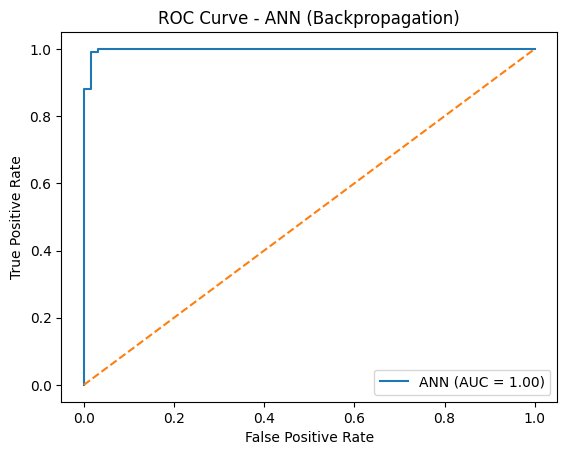

In [10]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for positive class
y_prob = ann.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ANN (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ANN (Backpropagation)")
plt.legend(loc="lower right")
plt.show()
